In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [2]:
raw_per = pd.read_csv('../Data/ALL/Annual/ALL_PBR_IRFS_SEPERATED.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('../Data/ALL/Annual/ALL_SILH_SUIK_RT_ANNUAL_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

In [3]:
raw_per.head(7)

,Term,19900101,20180930,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 5010,Unnamed: 5011,Unnamed: 5012,Unnamed: 5013,Unnamed: 5014,Unnamed: 5015,Unnamed: 5016,Unnamed: 5017,Unnamed: 5018,Unnamed: 5019
0,Symbol,A000010,A000011,A000012,A000020,A000021,A000022,A000023,A000030,A000031,...,A900310,A950010,A950030,A950070,A950100,A950110,A950130,A950140,A950160,A950170
1,Symbol Name,조흥은행,조흥은행(1신),조흥은행(2신),동화약품,동화약품공업(1신),동화약품(전환1신),동화약품(전환2신),우리은행,한빛은행(1신),...,컬러레이,평산차업 KDR,네프로아이티,중국고섬,SBI모기지,SBI핀테크솔루션즈,엑세스바이오,잉글우드랩,코오롱티슈진(Reg.S),JTC
2,Kind,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,...,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC
3,Item,S420006201,S420006201,S420006201,S420006201,S420006201,S420006201,S420006201,S420006201,S420006201,...,S420006201,S420006201,S420006201,S420006201,S420006201,S420006201,S420006201,S420006201,S420006201,S420006201
4,Item Name,PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),...,PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도),PBR(IFRS-별도)
5,Frequency,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,...,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY
6,1990-12-31,NaN,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 성과지표 데이터프레임 전처리 수행

In [4]:
per_df = Ko.Preprocessing(raw_per, column = '심볼', drop_limit=2)

# 수익률 DF 전처리

In [7]:
rt_df = Ko.Preprocessing(raw_rt, column = '심볼', drop_limit=2).apply(lambda x: Ko.rt_transform(x))

rt_df = rt_df.loc[per_df.index]
rt_df = rt_df.iloc[:, :-1]

In [8]:
rt_df.head()

,19901231,19911231,19921231,19931231,19941231,19951231,19961231,19971231,19981231,19991231,...,20081231,20091231,20101231,20111231,20121231,20131231,20141231,20151231,20161231,20171231
A000010,0.8188,0.8689,0.9717,1.0400,1.2105,0.7921,0.7560,0.5406,0.3468,0.6840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000020,0.8185,0.8322,1.4148,1.2452,2.2504,0.5620,0.9526,0.2715,2.5781,1.0949,...,0.5765,1.2265,0.6979,0.7713,1.4804,0.7268,1.2688,1.4614,0.9975,1.2007
A000030,0.8000,0.8833,0.9528,0.8731,0.9847,0.9810,0.7216,0.5345,0.2705,0.5818,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6494,0.8820,1.4456,1.2353
A000040,0.7571,0.5425,1.7913,1.1683,0.9068,0.7944,1.4471,0.0967,0.6666,0.6218,...,0.3075,1.8986,1.2052,0.9852,0.7423,0.8869,2.3627,1.2274,0.6792,0.3767
A000050,1.0082,1.0183,1.0489,1.1787,1.2502,0.7268,1.1234,0.3794,1.0925,1.3153,...,0.3128,2.1068,0.9378,0.7784,1.1437,1.3364,1.6697,1.0577,0.7948,0.9085


# 포트폴리오 구성 수행

In [9]:
data = Ko.portfolio_selection(per_df)

In [10]:
data.head(5)

,19901231,19911231,19921231,19931231,19941231,19951231,19961231,19971231,19981231,19991231,...,20081231,20091231,20101231,20111231,20121231,20131231,20141231,20151231,20161231,20171231
A000010,x,x,x,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
A000020,x,2,2,2,1,2,2,3,2,2,...,6,7,5,3,2,3,2,2,3,3
A000030,x,x,x,x,x,x,x,x,x,x,...,8,9,9,8,8,9,9,0,0,0
A000040,x,6,5,7,6,5,6,6,2,2,...,8,5,4,5,5,3,3,7,7,7
A000050,x,4,5,5,5,5,5,6,6,6,...,4,1,3,0,0,0,1,2,2,1


In [11]:
#data.to_csv('PER.csv')

# 포트폴리오 성과분석

In [12]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [13]:
result.min()

GROUP_0    0.486613
GROUP_1    0.628716
GROUP_2    0.536493
GROUP_3    0.561077
GROUP_4    0.515687
GROUP_5    0.545191
GROUP_6    0.470201
GROUP_7    0.550236
GROUP_8    0.436516
GROUP_9    0.307891
dtype: float64

In [14]:
result.max()

GROUP_0    4.058622
GROUP_1    3.121525
GROUP_2    2.583587
GROUP_3    3.435312
GROUP_4    3.192571
GROUP_5    4.102218
GROUP_6    2.397281
GROUP_7    2.022814
GROUP_8    2.252651
GROUP_9    2.282429
dtype: float64

# 1990년대

In [15]:
result.head(10)

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
1990-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1991-12-31,0.953596,0.777384,1.003075,0.857769,0.839079,0.821086,0.770321,0.747329,0.741449,0.712440
1992-12-31,1.500784,1.383193,1.306377,1.341780,1.431354,1.284072,1.195971,1.175910,1.230877,1.312049
1993-12-31,1.620611,1.493595,1.429996,1.631112,1.452340,1.319764,1.353856,1.354686,1.266464,1.373655
1994-12-31,1.405723,1.336321,1.572343,1.491159,1.457177,1.238686,1.408439,1.466791,1.354741,1.467323
1995-12-31,0.746365,0.732722,0.734430,0.804658,0.822558,0.720487,0.715122,0.694618,0.785831,0.705678
1996-12-31,1.279212,1.118896,1.164458,0.954458,0.981580,0.996477,1.142100,1.053476,0.879129,0.856431
1997-12-31,0.903404,0.701983,0.822319,0.566730,0.585531,0.615681,0.571214,0.564916,0.529821,0.425448
1998-12-31,1.486586,1.473963,1.560464,1.768093,1.730828,1.556391,1.378138,1.203404,0.997469,0.958265
1999-12-31,4.058622,2.940397,1.999549,3.435312,3.192571,4.102218,2.216751,2.022814,2.252651,2.282429


Text(0.5,1,'Performance result by PER Group')

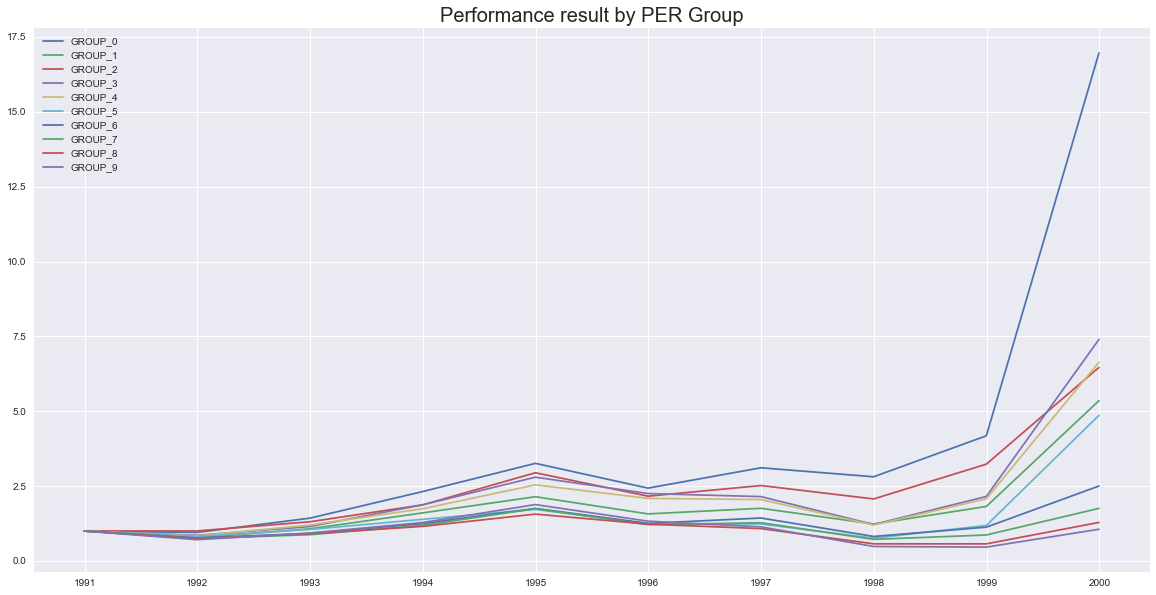

In [16]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[:10].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

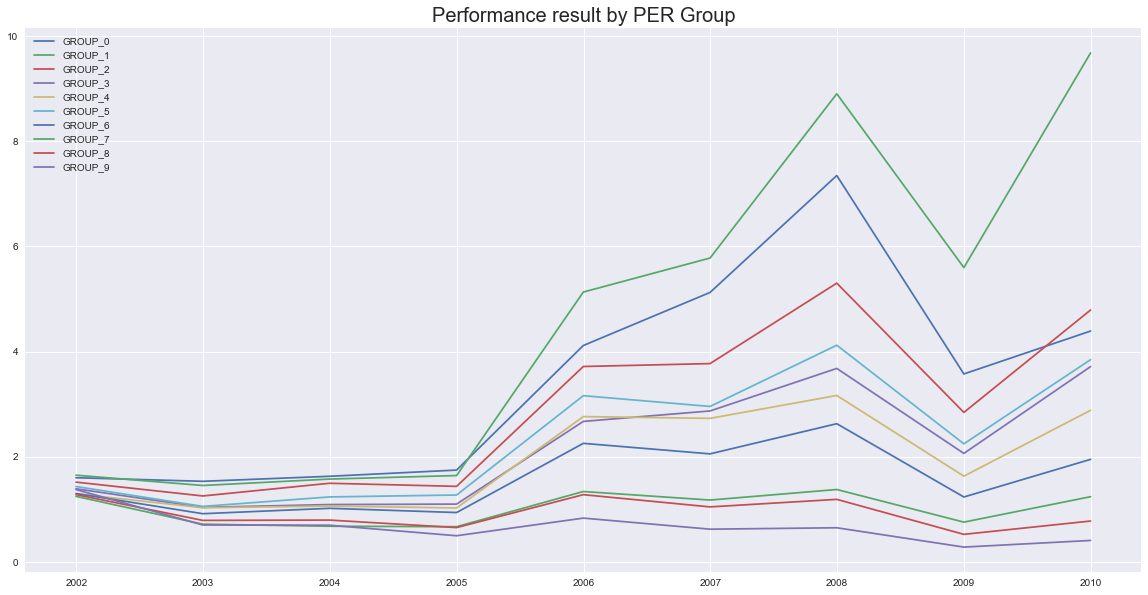

In [17]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[11:20].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

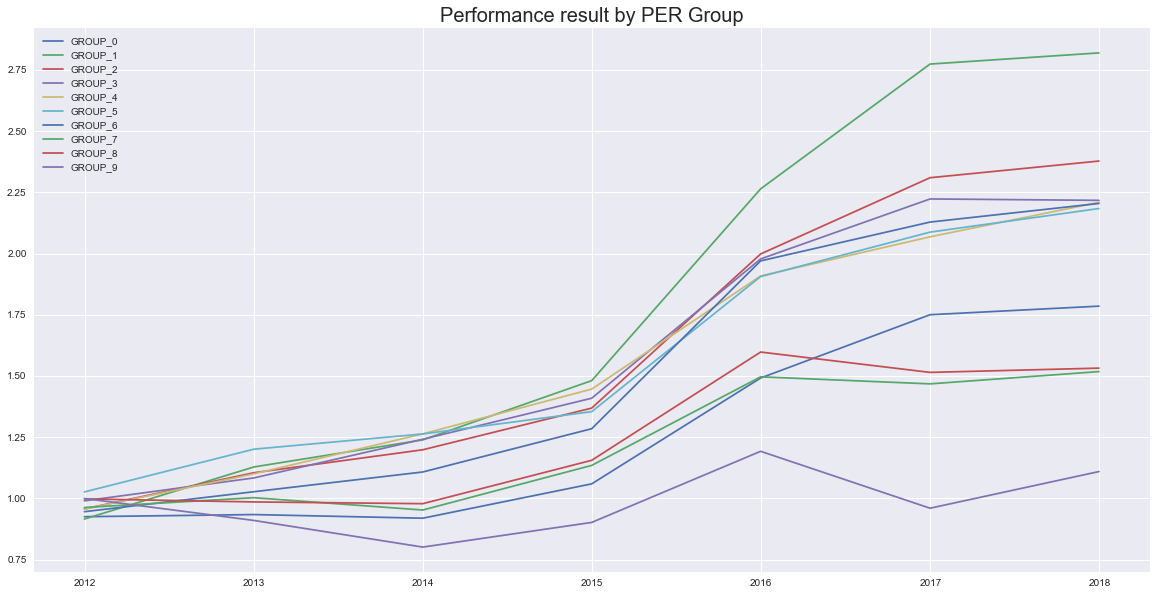

In [18]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[21:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

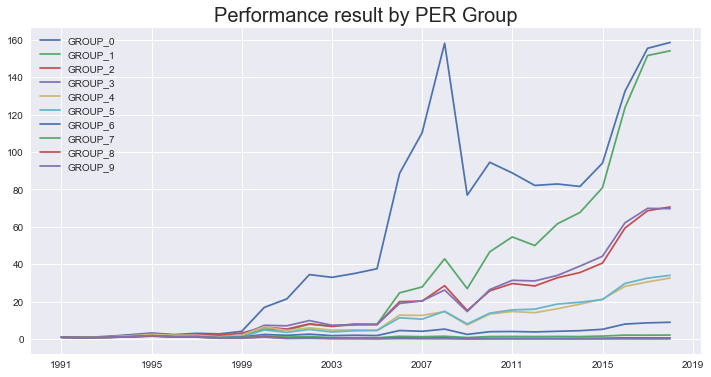

In [19]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Monthly return distribution by PER Group')

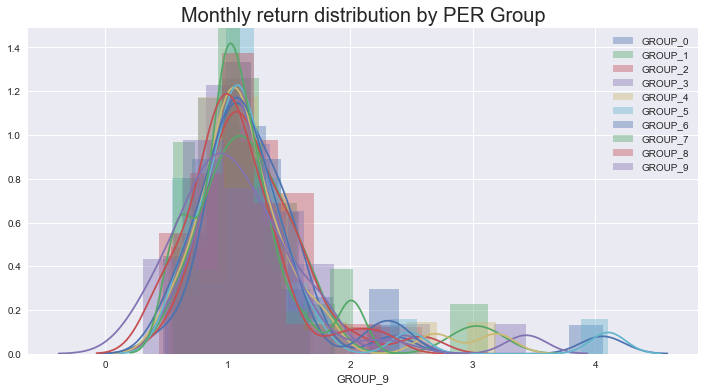

In [20]:
plt.figure(figsize = (12,6))

for column in result.columns:
    sns.distplot(result[column], label = column)

plt.legend(loc = 'best')
plt.title('Monthly return distribution by PER Group', fontsize = 20)

In [21]:
result.describe().apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
count,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000
mean,1.296,1.287,1.224,1.258,1.228,1.244,1.150,1.087,1.055,1.019
std,0.643,0.571,0.416,0.580,0.572,0.678,0.425,0.373,0.401,0.421
min,0.487,0.629,0.536,0.561,0.516,0.545,0.470,0.550,0.437,0.308
25%,0.977,0.979,0.990,0.983,0.963,0.981,0.919,0.929,0.821,0.740
50%,1.163,1.148,1.153,1.109,1.094,1.084,1.083,1.034,0.999,0.992
75%,1.415,1.479,1.438,1.396,1.348,1.338,1.316,1.215,1.240,1.315
max,4.059,3.122,2.584,3.435,3.193,4.102,2.397,2.023,2.253,2.282
